# Plotting univariate data in ggplot

Updating notebook 1 to also include `borough`.

### Python and R Setup

This setup allows you to use *Python* and *R* in the same notebook.

To set up a similar notebook, see quickstart instructions here:

https://github.com/dmil/jupyter-quickstart



In [11]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Import packages in R

In [3]:
%%R
install.packages('tidyverse')
require('tidyverse')

--- Please select a CRAN mirror for use in this session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]                   2: Australia (Canberra) [https]   
 3: Australia (Melbourne 1) [https]   4: Australia (Melbourne 2) [https]
 5: Austria (Wien) [https]            6: Belgium (Brussels) [https]     
 7: Brazil (PR) [https]               8: Brazil (SP 1) [https]          
 9: Brazil (SP 2) [https]            10: Bulgaria [https]               
11: Canada (MB) [https]              12: Canada (ON 1) [https]          
13: Canada (ON 2) [https]            14: Chile (Santiago) [https]       
15: China (Beijing 1) [https]        16: China (Beijing 2) [https]      
17: China (Beijing 3) [https]        18: China (Hefei) [https]          
19: China (Hong Kong) [https]        20: China (Jinan) [https]          
21: China (Lanzhou) [https]          22: China (Nanjing) [https]        
23: China (Shanghai 2) [https]       24: China (Shenzhen) [https]       
25: China (Wuhan) [https]            26: C

* installing *source* package ‘fastmap’ ...
** this is package ‘fastmap’ version ‘1.2.0’
** package ‘fastmap’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘Apple clang version 17.0.0 (clang-1700.4.4.1)’
using C++ compiler: ‘Apple clang version 17.0.0 (clang-1700.4.4.1)’
using SDK: ‘MacOSX26.1.sdk’
In file included from fastmap.cpp:1:
/opt/homebrew/Cellar/r/4.5.2_1/lib/R/include/R.h:39:11: fatal error: 'cstdlib' file not found
   39 | # include <cstdlib>
      |           ^~~~~~~~~
1 error generated.
make: *** [fastmap.o] Error 1
ERROR: compilation failed for package ‘fastmap’
* removing ‘/opt/homebrew/lib/R/4.5/site-library/fastmap’


clang++ -std=gnu++17 -I"/opt/homebrew/Cellar/r/4.5.2_1/lib/R/include" -DNDEBUG -Ilib/  -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -DR_NO_REMAP -fPIC  -stdlib=libc++ -isysroot /Library/Developer/CommandLineTools/SDKs/MacOSX.sdk  -c fastmap.cpp -o fastmap.o


* installing *source* package ‘digest’ ...
** this is package ‘digest’ version ‘0.6.39’
** package ‘digest’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘Apple clang version 17.0.0 (clang-1700.4.4.1)’
using C++ compiler: ‘Apple clang version 17.0.0 (clang-1700.4.4.1)’
using SDK: ‘MacOSX26.1.sdk’


clang++ -std=gnu++17 -I"/opt/homebrew/Cellar/r/4.5.2_1/lib/R/include" -DNDEBUG -I.  -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include    -fPIC  -stdlib=libc++ -isysroot /Library/Developer/CommandLineTools/SDKs/MacOSX.sdk  -c SpookyV2.cpp -o SpookyV2.o
clang -std=gnu23 -I"/opt/homebrew/Cellar/r/4.5.2_1/lib/R/include" -DNDEBUG -I.  -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include    -fPIC  -g -O2  -c aes.c -o aes.o
clang -std=gnu23 -I"/opt/homebrew/Cellar/r/4.5.2_1/lib/R/include" -DNDEBUG -I.  -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include    -fPIC  -g -O2  -c blake3.c -o blake3.o
clang -std=gnu23 -I"/opt/homebrew/Cellar/r/4.5.2_1/lib/R/include" -DNDEBUG -I.  -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/

In file included from crc32c.cpp:6:
./crc32c.h:12:10: fatal error: 'cstddef' file not found
   12 | #include <cstddef>
      |          ^~~~~~~~~
1 error generated.
make: *** [crc32c.o] Error 1
ERROR: compilation failed for package ‘digest’
* removing ‘/opt/homebrew/lib/R/4.5/site-library/digest’
* installing *source* package ‘timechange’ ...
** this is package ‘timechange’ version ‘0.4.0’
** package ‘timechange’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘Apple clang version 17.0.0 (clang-1700.4.4.1)’
using C++ compiler: ‘Apple clang version 17.0.0 (clang-1700.4.4.1)’
using SDK: ‘MacOSX26.1.sdk’
In file included from common.cpp:2:
./common.h:4:10: fatal error: 'cstdint' file not found
    4 | #include <cstdint>
      |          ^~~~~~~~~
1 error generated.
make: *** [common.o] Error 1
ERROR: compilation failed for package ‘timechange’
* removing ‘/opt/homebrew/lib/R/4.5/site-library/timechange’


clang++ -std=gnu++17 -I"/opt/homebrew/Cellar/r/4.5.2_1/lib/R/include" -DNDEBUG -I. -I./cctz/src/ -I'/opt/homebrew/lib/R/4.5/site-library/cpp11/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include    -fPIC  -stdlib=libc++ -isysroot /Library/Developer/CommandLineTools/SDKs/MacOSX.sdk  -c common.cpp -o common.o


* installing *source* package ‘systemfonts’ ...
** this is package ‘systemfonts’ version ‘1.3.1’
** package ‘systemfonts’ successfully unpacked and MD5 sums checked
** using staged installation


Found pkg-config cflags and libs!
Using PKG_CFLAGS=-I/opt/homebrew/opt/freetype/include/freetype2 -I/opt/homebrew/opt/libpng/include/libpng16
Using PKG_LIBS=-L/opt/homebrew/opt/freetype/lib -lfreetype -lbz2 -L/opt/homebrew/opt/libpng/lib -lpng16 -lz


** libs
using C++ compiler: ‘Apple clang version 17.0.0 (clang-1700.4.4.1)’
using SDK: ‘MacOSX26.1.sdk’
In file included from caches.cpp:1:
In file included from ./caches.h:3:
In file included from /opt/homebrew/lib/R/4.5/site-library/cpp11/include/cpp11/R.hpp:20:
/opt/homebrew/Cellar/r/4.5.2_1/lib/R/include/Rinternals.h:34:11: fatal error: 'cstdio' file not found
   34 | # include <cstdio>
      |           ^~~~~~~~
1 error generated.
make: *** [caches.o] Error 1
ERROR: compilation failed for package ‘systemfonts’
* removing ‘/opt/homebrew/lib/R/4.5/site-library/systemfonts’


rm -f systemfonts.so caches.o cpp11.o dev_metrics.o font_matching.o font_local.o font_variation.o font_registry.o ft_cache.o string_shape.o font_metrics.o font_outlines.o font_fallback.o string_metrics.o emoji.o cache_store.o init.o mac/FontManagerMac.o
clang++ -std=gnu++17 -I"/opt/homebrew/Cellar/r/4.5.2_1/lib/R/include" -DNDEBUG -I/opt/homebrew/opt/freetype/include/freetype2 -I/opt/homebrew/opt/libpng/include/libpng16 -I'/opt/homebrew/lib/R/4.5/site-library/cpp11/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include    -fPIC  -stdlib=libc++ -isysroot /Library/Developer/CommandLineTools/SDKs/MacOSX.sdk  -c caches.cpp -o caches.o


* installing *source* package ‘fs’ ...
** this is package ‘fs’ version ‘1.6.6’
** package ‘fs’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C++ compiler: ‘Apple clang version 17.0.0 (clang-1700.4.4.1)’
using SDK: ‘MacOSX26.1.sdk’
dir.cc:1:10: fatal error: 'cstring' file not found
    1 | #include <cstring>
      |          ^~~~~~~~~


clang++ -std=gnu++17 -I"/opt/homebrew/Cellar/r/4.5.2_1/lib/R/include" -DNDEBUG -I./libuv-1.44.2/include -I. -pthread  -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include    -fPIC  -stdlib=libc++ -isysroot /Library/Developer/CommandLineTools/SDKs/MacOSX.sdk  -c dir.cc -o dir.o


1 error generated.
make: *** [dir.o] Error 1
ERROR: compilation failed for package ‘fs’
* removing ‘/opt/homebrew/lib/R/4.5/site-library/fs’
* installing *source* package ‘stringi’ ...
** this is package ‘stringi’ version ‘1.8.7’
** package ‘stringi’ successfully unpacked and MD5 sums checked
** using staged installation


checking for R_HOME... /opt/homebrew/Cellar/r/4.5.2_1/lib/R
checking for R... /opt/homebrew/Cellar/r/4.5.2_1/lib/R/bin/R
checking for endianness... little
checking for cat... /bin/cat
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether the compiler supports GNU C++... yes
checking whether clang++ -std=gnu++17 accepts -g... yes
checking for clang++ -std=gnu++17 option to enable C++11 features... unsupported
checking for clang++ -std=gnu++17 option to enable C++98 features... unsupported
checking whether the C++ compiler supports the 'long long' type... no
*** Trying with C++11 compiler disabled.
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking

ERROR: configuration failed for package ‘stringi’
* removing ‘/opt/homebrew/lib/R/4.5/site-library/stringi’


* installing *source* package ‘dplyr’ ...
** this is package ‘dplyr’ version ‘1.1.4’
** package ‘dplyr’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C++ compiler: ‘Apple clang version 17.0.0 (clang-1700.4.4.1)’
using SDK: ‘MacOSX26.1.sdk’
In file included from chop.cpp:1:
In file included from ./dplyr.h:5:
/opt/homebrew/Cellar/r/4.5.2_1/lib/R/include/R.h:39:11: fatal error: 'cstdlib' file not found
   39 | # include <cstdlib>
      |           ^~~~~~~~~
1 error generated.
make: *** [chop.o] Error 1
ERROR: compilation failed for package ‘dplyr’
* removing ‘/opt/homebrew/lib/R/4.5/site-library/dplyr’


clang++ -std=gnu++17 -I"/opt/homebrew/Cellar/r/4.5.2_1/lib/R/include" -DNDEBUG   -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include    -fPIC  -stdlib=libc++ -isysroot /Library/Developer/CommandLineTools/SDKs/MacOSX.sdk  -c chop.cpp -o chop.o


* installing *source* package ‘haven’ ...
** this is package ‘haven’ version ‘2.5.5’
** package ‘haven’ successfully unpacked and MD5 sums checked
** using staged installation


Found pkg-config cflags and libs!
Using PKG_CFLAGS=
Using PKG_LIBS=-lz


** libs
using C compiler: ‘Apple clang version 17.0.0 (clang-1700.4.4.1)’
using C++ compiler: ‘Apple clang version 17.0.0 (clang-1700.4.4.1)’
using SDK: ‘MacOSX26.1.sdk’


clang -std=gnu23 -I"/opt/homebrew/Cellar/r/4.5.2_1/lib/R/include" -DNDEBUG  -I'/opt/homebrew/lib/R/4.5/site-library/cpp11/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -Ireadstat -DHAVE_ZLIB -fPIC  -g -O2  -c tagged_na.c -o tagged_na.o
clang -std=gnu23 -I"/opt/homebrew/Cellar/r/4.5.2_1/lib/R/include" -DNDEBUG  -I'/opt/homebrew/lib/R/4.5/site-library/cpp11/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -Ireadstat -DHAVE_ZLIB -fPIC  -g -O2  -c readstat/CKHashTable.c -o readstat/CKHashTable.o
clang -std=gnu23 -I"/opt/homebrew/Cellar/r/4.5.2_1/lib/R/include" -DNDEBUG  -I'/opt/homebrew/lib/R/4.5/site-library/cpp11/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -Ireadstat -DHAVE_ZLIB -fPIC  -g -O2  -c readstat/readstat_

DfReader.cpp:1:10: fatal error: 'fstream' file not found
    1 | #include <fstream>
      |          ^~~~~~~~~
1 error generated.
make: *** [DfReader.o] Error 1
ERROR: compilation failed for package ‘haven’
* removing ‘/opt/homebrew/lib/R/4.5/site-library/haven’


* installing *source* package ‘readxl’ ...
** this is package ‘readxl’ version ‘1.4.5’
** package ‘readxl’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘Apple clang version 17.0.0 (clang-1700.4.4.1)’
using C++ compiler: ‘Apple clang version 17.0.0 (clang-1700.4.4.1)’
using SDK: ‘MacOSX26.1.sdk’
In file included from cpp11.cpp:4:
./readxl_types.h:1:10: fatal error: 'set' file not found
    1 | #include <set>
      |          ^~~~~
1 error generated.
make: *** [cpp11.o] Error 1
ERROR: compilation failed for package ‘readxl’
* removing ‘/opt/homebrew/lib/R/4.5/site-library/readxl’


clang++ -std=gnu++17 -I"/opt/homebrew/Cellar/r/4.5.2_1/lib/R/include" -DNDEBUG -Iunix -I. -I'/opt/homebrew/lib/R/4.5/site-library/cpp11/include' -I'/opt/homebrew/lib/R/4.5/site-library/progress/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fvisibility=hidden -fPIC  -stdlib=libc++ -isysroot /Library/Developer/CommandLineTools/SDKs/MacOSX.sdk  -c cpp11.cpp -o cpp11.o


* installing *source* package ‘xml2’ ...
** this is package ‘xml2’ version ‘1.5.2’
** package ‘xml2’ successfully unpacked and MD5 sums checked
** using staged installation


Using PKG_CFLAGS=-I/private/var/folders/j5/twx6v7jj4nq17ymrbt5c1klw0000gn/T/RtmpRjFXG1/R.INSTALL9d6e51b72ad3/xml2/.deps/include/libxml2 -I/private/var/folders/j5/twx6v7jj4nq17ymrbt5c1klw0000gn/T/RtmpRjFXG1/R.INSTALL9d6e51b72ad3/xml2/.deps/include
Using PKG_LIBS=/private/var/folders/j5/twx6v7jj4nq17ymrbt5c1klw0000gn/T/RtmpRjFXG1/R.INSTALL9d6e51b72ad3/xml2/.deps/libxml2 -lz -lpthread -licucore -lm
clang++ -std=gnu++17 -I"/opt/homebrew/Cellar/r/4.5.2_1/lib/R/include" -DNDEBUG -I../inst/include -I/private/var/folders/j5/twx6v7jj4nq17ymrbt5c1klw0000gn/T/RtmpRjFXG1/R.INSTALL9d6e51b72ad3/xml2/.deps/include/libxml2 -I/private/var/folders/j5/twx6v7jj4nq17ymrbt5c1klw0000gn/T/RtmpRjFXG1/R.INSTALL9d6e51b72ad3/xml2/.deps/include -DUCHAR_TYPE=wchar_t -DU_SHOW_CPLUSPLUS_API=0 -DSTRICT_R_HEADERS -DR_NO_REMAP  -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fvisibility=hidden -fPIC  -stdlib=libc++ -isysroot /Library/Deve

** libs
using C compiler: ‘Apple clang version 17.0.0 (clang-1700.4.4.1)’
using C++ compiler: ‘Apple clang version 17.0.0 (clang-1700.4.4.1)’
using SDK: ‘MacOSX26.1.sdk’
In file included from connection.cpp:1:
/opt/homebrew/Cellar/r/4.5.2_1/lib/R/include/Rinternals.h:34:11: fatal error: 'cstdio' file not found
   34 | # include <cstdio>
      |           ^~~~~~~~
1 error generated.
make: *** [connection.o] Error 1
ERROR: compilation failed for package ‘xml2’
* removing ‘/opt/homebrew/lib/R/4.5/site-library/xml2’


ERROR: dependency ‘fastmap’ is not available for package ‘cachem’
Perhaps try a variation of:
install.packages('fastmap')
* removing ‘/opt/homebrew/lib/R/4.5/site-library/cachem’
ERROR: dependencies ‘digest’, ‘fastmap’ are not available for package ‘htmltools’
Perhaps try a variation of:
install.packages(c('digest', 'fastmap'))
* removing ‘/opt/homebrew/lib/R/4.5/site-library/htmltools’


ERROR: dependency ‘fs’ is not available for package ‘gargle’
Perhaps try a variation of:
install.packages('fs')
* removing ‘/opt/homebrew/lib/R/4.5/site-library/gargle’


ERROR: dependencies ‘stringi’, ‘systemfonts’ are not available for package ‘textshaping’
Perhaps try a variation of:
install.packages(c('stringi', 'systemfonts'))
* removing ‘/opt/homebrew/lib/R/4.5/site-library/textshaping’


ERROR: dependency ‘dplyr’ is not available for package ‘dtplyr’
Perhaps try a variation of:
install.packages('dplyr')
* removing ‘/opt/homebrew/lib/R/4.5/site-library/dtplyr’


ERROR: dependency ‘timechange’ is not available for package ‘lubridate’
Perhaps try a variation of:
install.packages('timechange')
* removing ‘/opt/homebrew/lib/R/4.5/site-library/lubridate’


ERROR: dependency ‘stringi’ is not available for package ‘stringr’
Perhaps try a variation of:
install.packages('stringi')
* removing ‘/opt/homebrew/lib/R/4.5/site-library/stringr’


ERROR: dependencies ‘fs’, ‘htmltools’ are not available for package ‘sass’
Perhaps try a variation of:
install.packages(c('fs', 'htmltools'))
* removing ‘/opt/homebrew/lib/R/4.5/site-library/sass’


ERROR: dependency ‘htmltools’ is not available for package ‘fontawesome’
Perhaps try a variation of:
install.packages('htmltools')
* removing ‘/opt/homebrew/lib/R/4.5/site-library/fontawesome’


ERROR: dependency ‘htmltools’ is not available for package ‘jquerylib’
Perhaps try a variation of:
install.packages('htmltools')
* removing ‘/opt/homebrew/lib/R/4.5/site-library/jquerylib’
ERROR: dependency ‘cachem’ is not available for package ‘memoise’
Perhaps try a variation of:
install.packages('cachem')
* removing ‘/opt/homebrew/lib/R/4.5/site-library/memoise’


ERROR: dependency ‘stringr’ is not available for package ‘selectr’
Perhaps try a variation of:
install.packages('stringr')
* removing ‘/opt/homebrew/lib/R/4.5/site-library/selectr’


ERROR: dependency ‘gargle’ is not available for package ‘googledrive’
Perhaps try a variation of:
install.packages('gargle')
* removing ‘/opt/homebrew/lib/R/4.5/site-library/googledrive’


ERROR: dependencies ‘systemfonts’, ‘textshaping’ are not available for package ‘ragg’
Perhaps try a variation of:
install.packages(c('systemfonts', 'textshaping'))
* removing ‘/opt/homebrew/lib/R/4.5/site-library/ragg’


ERROR: dependencies ‘dplyr’, ‘stringr’ are not available for package ‘tidyr’
Perhaps try a variation of:
install.packages(c('dplyr', 'stringr'))
* removing ‘/opt/homebrew/lib/R/4.5/site-library/tidyr’


ERROR: dependencies ‘cachem’, ‘fastmap’, ‘htmltools’, ‘jquerylib’, ‘memoise’, ‘sass’ are not available for package ‘bslib’
Perhaps try a variation of:
install.packages(c('cachem', 'fastmap', 'htmltools', 'jquerylib', 'memoise', 'sass'))
* removing ‘/opt/homebrew/lib/R/4.5/site-library/bslib’


ERROR: dependencies ‘dplyr’, ‘stringr’, ‘tidyr’ are not available for package ‘broom’
Perhaps try a variation of:
install.packages(c('dplyr', 'stringr', 'tidyr'))
* removing ‘/opt/homebrew/lib/R/4.5/site-library/broom’


ERROR: dependency ‘memoise’ is not available for package ‘conflicted’
Perhaps try a variation of:
install.packages('memoise')
* removing ‘/opt/homebrew/lib/R/4.5/site-library/conflicted’


ERROR: dependencies ‘dplyr’, ‘tidyr’ are not available for package ‘dbplyr’
Perhaps try a variation of:
install.packages(c('dplyr', 'tidyr'))
* removing ‘/opt/homebrew/lib/R/4.5/site-library/dbplyr’


ERROR: dependencies ‘gargle’, ‘googledrive’ are not available for package ‘googlesheets4’
Perhaps try a variation of:
install.packages(c('gargle', 'googledrive'))
* removing ‘/opt/homebrew/lib/R/4.5/site-library/googlesheets4’


ERROR: dependencies ‘selectr’, ‘xml2’ are not available for package ‘rvest’
Perhaps try a variation of:
install.packages(c('selectr', 'xml2'))
* removing ‘/opt/homebrew/lib/R/4.5/site-library/rvest’


ERROR: dependencies ‘bslib’, ‘fontawesome’, ‘htmltools’, ‘jquerylib’ are not available for package ‘rmarkdown’
Perhaps try a variation of:
install.packages(c('bslib', 'fontawesome', 'htmltools', 'jquerylib'))
* removing ‘/opt/homebrew/lib/R/4.5/site-library/rmarkdown’


ERROR: dependencies ‘broom’, ‘tidyr’ are not available for package ‘modelr’
Perhaps try a variation of:
install.packages(c('broom', 'tidyr'))
* removing ‘/opt/homebrew/lib/R/4.5/site-library/modelr’


ERROR: dependencies ‘fs’, ‘rmarkdown’ are not available for package ‘reprex’
Perhaps try a variation of:
install.packages(c('fs', 'rmarkdown'))
* removing ‘/opt/homebrew/lib/R/4.5/site-library/reprex’


ERROR: dependencies ‘broom’, ‘conflicted’, ‘dbplyr’, ‘dplyr’, ‘dtplyr’, ‘googledrive’, ‘googlesheets4’, ‘haven’, ‘lubridate’, ‘modelr’, ‘ragg’, ‘readxl’, ‘reprex’, ‘rvest’, ‘stringr’, ‘tidyr’, ‘xml2’ are not available for package ‘tidyverse’
Perhaps try a variation of:
install.packages(c('broom', 'conflicted', 'dbplyr', 'dplyr', 'dtplyr', 'googledrive', 'googlesheets4', 'haven', 'lubridate', 'modelr', 'ragg', 'readxl', 'reprex', 'rvest', 'stringr', 'tidyr', 'xml2'))
* removing ‘/opt/homebrew/lib/R/4.5/site-library/tidyverse’


Installing package into ‘/opt/homebrew/lib/R/4.5/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘fastmap’, ‘sass’, ‘digest’, ‘cachem’, ‘bslib’, ‘fontawesome’, ‘htmltools’, ‘jquerylib’, ‘memoise’, ‘gargle’, ‘timechange’, ‘systemfonts’, ‘textshaping’, ‘fs’, ‘rmarkdown’, ‘selectr’, ‘stringi’, ‘broom’, ‘conflicted’, ‘dbplyr’, ‘dplyr’, ‘dtplyr’, ‘googledrive’, ‘googlesheets4’, ‘haven’, ‘lubridate’, ‘modelr’, ‘ragg’, ‘readxl’, ‘reprex’, ‘rvest’, ‘stringr’, ‘tidyr’, ‘xml2’

trying URL 'https://cloud.r-project.org/src/contrib/fastmap_1.2.0.tar.gz'
trying URL 'https://cloud.r-project.org/src/contrib/sass_0.4.10.tar.gz'
trying URL 'https://cloud.r-project.org/src/contrib/digest_0.6.39.tar.gz'
trying URL 'https://cloud.r-project.org/src/contrib/cachem_1.1.0.tar.gz'
trying URL 'https://cloud.r-project.org/src/contrib/bslib_0.10.0.tar.gz'
trying URL 'https://cloud.r-project.org/src/contrib/fontawesome_0.5.3.tar.gz'
trying URL 'https://cloud.r-project.org/src/contrib/htmlto

In [4]:
%%R

require('tidyverse')


Loading required package: tidyverse
In addition: Warning message:
In library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE,  :
  there is no package called ‘tidyverse’


### Read data

In [5]:
%%R

# Read data
df <- read.csv('housing_data.csv')
df

      zip population       borough pct_hispanic_or_latino pct_asian
1   11368     112088        QUEENS                  76.49     11.60
2   11385     107796        QUEENS                  45.05      6.46
3   11211     103123      BROOKLYN                  24.13      5.53
4   11208     101313      BROOKLYN                  40.58      6.01
5   10467     101255         BRONX                  52.08      5.68
6   11236     100844      BROOKLYN                   7.66      2.58
7   11226      99558      BROOKLYN                  16.40      3.07
8   11373      94437        QUEENS                  41.69     48.47
9   11234      93534      BROOKLYN                  11.09      7.19
10  11220      93170      BROOKLYN                  41.33     41.35
11  10456      92717         BRONX                  59.11      0.63
12  11214      92644      BROOKLYN                  17.90     36.87
13  10025      92251     MANHATTAN                  23.56      9.69
14  11207      91083      BROOKLYN              

### Histogram

👉 Try It

Grab your histogram code from the previous exercise (or just use the sample below) 

- modify the code to plot one histogram per borough 
- add a meaningful title and subtitle and axis labels

_(hint: this may require you to look up how `facet_wrap` works)._

Need help getting started? Try the R Graphics Cookbook:
https://r-graphics.org


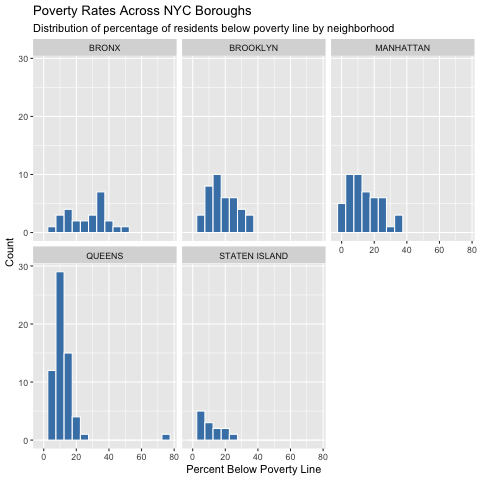

In [13]:
%%R 

library(ggplot2)

ggplot(df) + 
    aes(x=pct_below_poverty) +
    geom_histogram(binwidth=5, fill="steelblue", color="white") +
    facet_wrap(~borough) +
    labs(
        title = "Poverty Rates Across NYC Boroughs",
        subtitle = "Distribution of percentage of residents below poverty line by neighborhood",
        x = "Percent Below Poverty Line",
        y = "Count"
    )

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


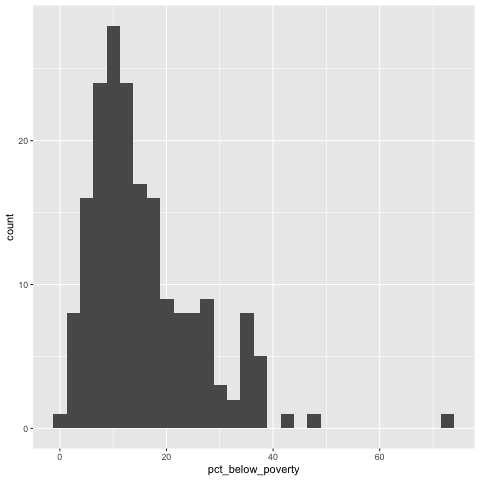

In [14]:
%%R 

ggplot(df) + 
    aes(x=pct_below_poverty) +
    geom_histogram() 

### Dotplot

👉 Try It

Grab your dotplot code from the previous exercise (or just use the sample below) 

- modify the code to plot one plot per borough 
- add a meaningful title and subtitle and axis labels

_(hint: you might want to change the `y` aesthetic instead of using `facet_wrap`)._

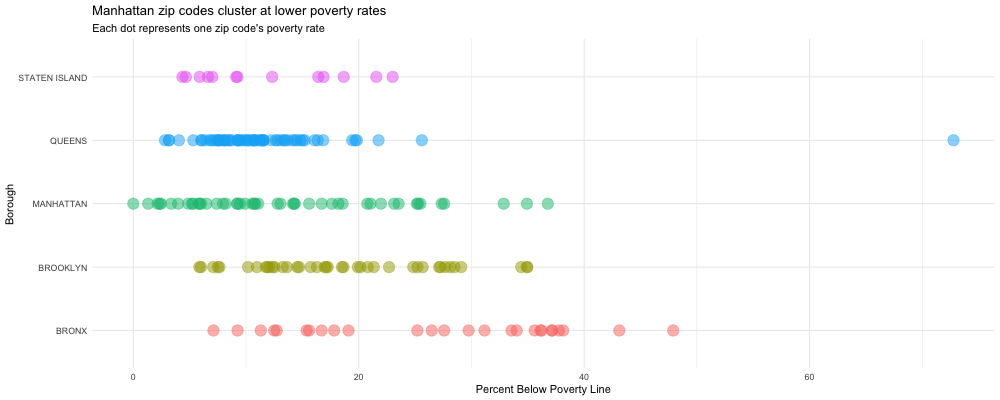

In [25]:
%%R -w 1000 -h 400

library(ggplot2)

ggplot(df) + 
    aes(x = pct_below_poverty, y = borough, color = borough) +
    geom_point(alpha = 0.5, size = 5) +
    labs(
        title = "Manhattan zip codes cluster at lower poverty rates",
        subtitle = "Each dot represents one zip code's poverty rate",
        x = "Percent Below Poverty Line",
        y = "Borough"
    ) +
    theme_minimal() +
    theme(legend.position = "none")


### Dotplot (with jitter)

👉 Try It

Grab your dotplot code from the previous exercise (or just use the sample below) 

- modify the code to plot one plot per borough 
- add a meaningful title and subtitle and axis labels

_(hint: you might also need to mess with the y axis, but also the colors of the dots)._

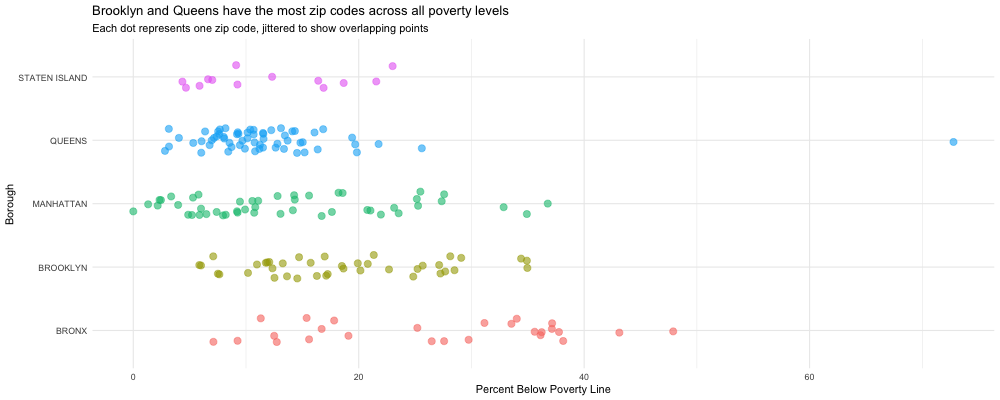

In [24]:
%%R -w 1000 -h 400

library(ggplot2)

ggplot(df) + 
    aes(x = pct_below_poverty, y = borough, color = borough) +
    geom_jitter(height = 0.2, alpha = 0.6, size = 3) +
    labs(
        title = "Brooklyn and Queens have the most zip codes across all poverty levels",
        subtitle = "Each dot represents one zip code, jittered to show overlapping points",
        x = "Percent Below Poverty Line",
        y = "Borough"
    ) +
    theme_minimal() +
    theme(legend.position = "none")


### Density Plot

👉 Try It

Grab your density plot code from the previous exercise (or just use the sample below)

- modify the code to plot one plot per borough


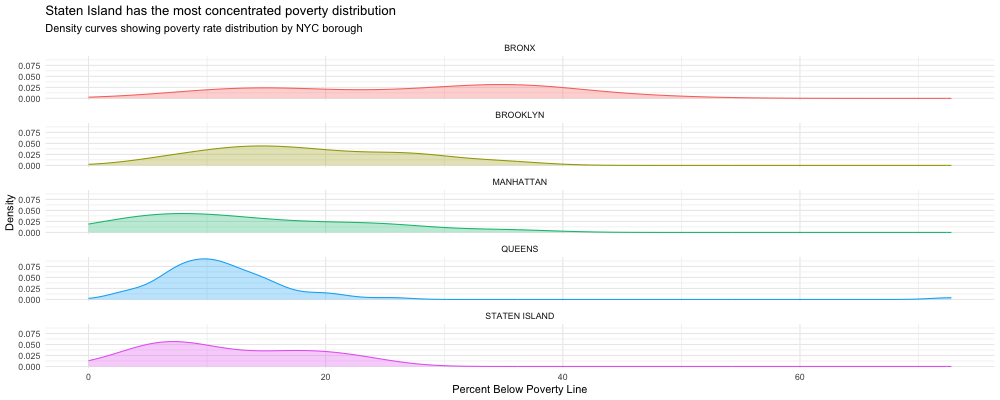

In [23]:
%%R -w 1000 -h 400

library(ggplot2)

ggplot(df) + 
    aes(x = pct_below_poverty, fill = borough, color = borough) +
    geom_density(alpha = 0.3) +
    facet_wrap(~borough, ncol = 1) +
    labs(
        title = "Staten Island has the most concentrated poverty distribution",
        subtitle = "Density curves showing poverty rate distribution by NYC borough",
        x = "Percent Below Poverty Line",
        y = "Density"
    ) +
    theme_minimal() +
    theme(legend.position = "none")


### Box and Whisker Plot
http://www.sthda.com/english/wiki/ggplot2-box-plot-quick-start-guide-r-software-and-data-visualization



👉 Try It

Grab your box and whisker plot code from the previous exercise (or just use the sample below)

- modify the code to plot one plot per borough
- add a title and subtitle that helps tell a story with this chart

👉 Bonus
- see if you can annotate the biggest oulier


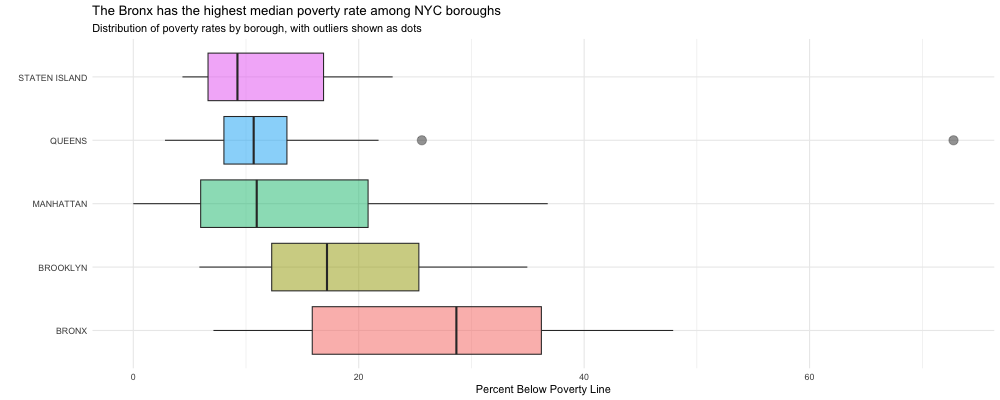

In [22]:
%%R -w 1000 -h 400

library(ggplot2)

ggplot(df) + 
    aes(x = pct_below_poverty, y = borough, fill = borough) +
    geom_boxplot(alpha = 0.5, outlier.size = 4) +
    labs(
        title = "The Bronx has the highest median poverty rate among NYC boroughs",
        subtitle = "Distribution of poverty rates by borough, with outliers shown as dots",
        x = "Percent Below Poverty Line",
        y = ""
    ) +
    theme_minimal() +
    theme(legend.position = "none")



### Violin Plot

👉 Try It

Grab your violin plot code from the previous exercise (or just use the sample below)

- modify the code to plot one plot per borough
- write about how this chart looks different from the box and whisker plot and for what purpose it may be more useful
> Violin plots show the full shape of the distribution, while box plots only show summary statistics like median, quartiles, outliers. Violin plots are more useful when you want to see bimodal distributions (two peaks) or skewness that box plots hide.



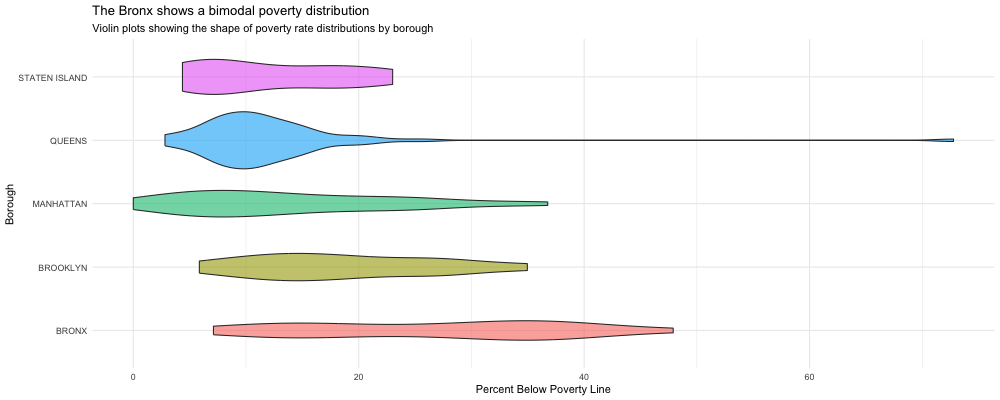

In [26]:
%%R -w 1000 -h 400

library(ggplot2)

ggplot(df) + 
    aes(x = pct_below_poverty, y = borough, fill = borough) +
    geom_violin(alpha = 0.6) +
    labs(
        title = "The Bronx shows a bimodal poverty distribution",
        subtitle = "Violin plots showing the shape of poverty rate distributions by borough",
        x = "Percent Below Poverty Line",
        y = "Borough"
    ) +
    theme_minimal() +
    theme(legend.position = "none")


### Beeswarm 
👉 Bonus

Grab your beeswarm code from the previous exercise

- modify the code to plot one plot per borough
- add a title and subtitle that helps tell a story with this chart

Orientation inferred to be along y-axis; override with
`position_beeswarm(orientation = 'x')`


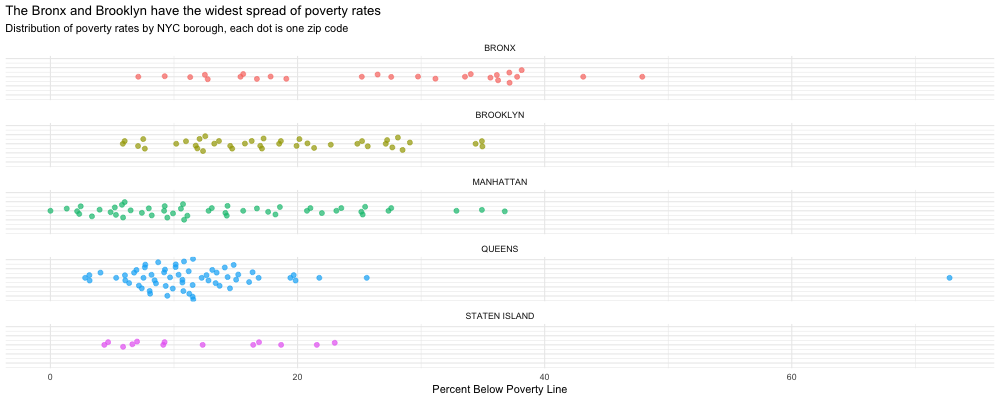

In [20]:
%%R -w 1000 -h 400

library(ggplot2)
library(ggbeeswarm)

ggplot(df) + 
    aes(x = pct_below_poverty, y = 1, color = borough) +
    geom_beeswarm(cex = 3, alpha = 0.7, size = 2) +
    facet_wrap(~borough, ncol = 1) +
    labs(
        title = "The Bronx and Brooklyn have the widest spread of poverty rates",
        subtitle = "Distribution of poverty rates by NYC borough, each dot is one zip code",
        x = "Percent Below Poverty Line"
    ) +
    theme_minimal() +
    theme(
        axis.title.y = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        legend.position = "none"
    )
